<a href="https://colab.research.google.com/drive/1HfeaDbNabfbM7qQL9MUqL58jvtDHl2sL?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

**Dataset Used:**

BBC Document Classfication

https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification

In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/Datasets/bbc-fulltext (document classification).zip'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extracting all the contents into a directory
    zip_ref.extractall("/content/drive/MyDrive/Datasets")

# Listing the contents of the extracted folder
extracted_folder_path = '/content/drive/MyDrive/Datasets/bbc-fulltext (document classification)/bbc'
os.listdir(extracted_folder_path)

['README.TXT', 'entertainment', 'politics', 'sport', 'tech', 'business']

This cell handles the extraction of a ZIP file containing the document dataset. It imports zipfile and os libraries for file handling and operating system operations. The zip_file_path variable specifies the location of the ZIP file. Using zipfile.ZipFile, the content is extracted to a specified directory. The os.listdir function then lists the contents of the extracted folder, which is essential to verify the successful extraction and to understand the structure and files within the dataset.

In [ ]:
# Reading the README.TXT file
readme_file_path = os.path.join(extracted_folder_path, 'README.TXT')

with open(readme_file_path, 'r') as file:
    readme_content = file.read()

readme_content

'Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.\nNatural Classes: 5 (business, entertainment, politics, sport, tech)\n\nIf you make use of the dataset, please consider citing the publication: \n- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.\n\nAll rights, including copyright, in the content of the original articles are owned by the BBC.\n\nContact Derek Greene <derek.greene@ucd.ie> for further information.\nhttp://mlg.ucd.ie/datasets/bbc.html\n\n'

In [ ]:
import random

# Function to load a few sample files from a given directory
def load_sample_files(category_path, num_samples=3):
    files = os.listdir(category_path)
    sample_files = random.sample(files, num_samples)
    sample_texts = []
    for file in sample_files:
        file_path = os.path.join(category_path, file)
        with open(file_path, 'r', encoding='latin1') as f:
            sample_texts.append(f.read())
    return sample_texts

# Load sample documents from each category
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
sample_documents = {}

for category in categories:
    category_path = os.path.join(extracted_folder_path, category)
    sample_documents[category] = load_sample_files(category_path)

# Display the first few lines of one sample document from each category
for category, texts in sample_documents.items():
    print(f"Category: {category} - Sample Document:")
    print(texts[0][:200])  # Displaying first 200 characters
    print("..."*10, "\n")

Category: business - Sample Document:
Fiat chief takes steering wheel

The chief executive of the Fiat conglomerate has taken day-to-day control of its struggling car business in an effort to turn it around.

Sergio Marchionne has replace
.............................. 

Category: entertainment - Sample Document:
Ray DVD beats box office takings

Oscar-nominated film biopic Ray has surpassed its US box office takings with a combined tally of $80m (Â£43m) from DVD and video sales and rentals.

Ray's success on 
.............................. 

Category: politics - Sample Document:
Labour's election love-in

Peace and love have been in short supply in the Labour party in recent days.

If press reports are to be believed, Alan Milburn and Gordon Brown have been at each other's th
.............................. 

Category: sport - Sample Document:
Real will finish abandoned match

Real Madrid and Real Socieded will play the final six minutes of their match, which was abandoned on Sunday be

This cell defines a function load_sample_files to load a few sample files from each category in the dataset. It randomly selects a specified number of documents from each category directory and reads their content. This function is then used to load sample documents from predefined categories ('business', 'entertainment', 'politics', 'sport', 'tech'). The first few lines of one sample document from each category are displayed. This step provides a preliminary view of the document contents and helps in understanding the nature and diversity of text data within each category, which is essential for document clustering.

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Counting the number of documents in each category
document_count = {category: len(os.listdir(os.path.join(extracted_folder_path, category))) for category in categories}

# Analyzing the length of the documents and some basic text analysis
word_counts = {category: [] for category in categories}
common_words = {category: Counter() for category in categories}

for category in categories:
    category_path = os.path.join(extracted_folder_path, category)
    files = os.listdir(category_path)
    for file in files:
        file_path = os.path.join(category_path, file)
        with open(file_path, 'r', encoding='latin1') as f:
            content = f.read()
            tokens = word_tokenize(content)
            word_counts[category].append(len(tokens))
            common_words[category].update(tokens.lower() for tokens in tokens)

# Displaying the document count and a brief word count analysis for each category
document_count, {category: sum(word_counts[category])//len(word_counts[category]) for category in categories}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


({'business': 510,
  'entertainment': 386,
  'politics': 417,
  'sport': 511,
  'tech': 401},
 {'business': 376,
  'entertainment': 379,
  'politics': 514,
  'sport': 380,
  'tech': 565})

In [ ]:
# Alternative method for tokenization and counting words (basic approach)
def simple_tokenize(text):
    return text.split()

# Recalculating word counts with the simpler method
word_counts = {category: [] for category in categories}
common_words = {category: Counter() for category in categories}

for category in categories:
    category_path = os.path.join(extracted_folder_path, category)
    files = os.listdir(category_path)
    for file in files:
        file_path = os.path.join(category_path, file)
        with open(file_path, 'r', encoding='latin1') as f:
            content = f.read()
            tokens = simple_tokenize(content)
            word_counts[category].append(len(tokens))
            common_words[category].update(token.lower() for token in tokens)

# Displaying the document count and average word count for each category
average_word_count = {category: sum(word_counts[category]) // len(word_counts[category]) for category in categories}
document_count, average_word_count

({'business': 510,
  'entertainment': 386,
  'politics': 417,
  'sport': 511,
  'tech': 401},
 {'business': 328,
  'entertainment': 330,
  'politics': 453,
  'sport': 329,
  'tech': 502})

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to clean and preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Tokenization (simple split by whitespace)
    tokens = simple_tokenize(text)
    # Removing stop words and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() and token not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

# Creating a DataFrame to hold the text and category
data = []

for category in categories:
    category_path = os.path.join(extracted_folder_path, category)
    files = os.listdir(category_path)
    for file in files:
        file_path = os.path.join(category_path, file)
        with open(file_path, 'r', encoding='latin1') as f:
            content = f.read()
            cleaned_content = preprocess_text(content)
            data.append([category, cleaned_content])

# Creating the DataFrame
df = pd.DataFrame(data, columns=['category', 'text'])

# Displaying the first few rows of the DataFrame
df.head()


,category,text
0,business,ad sales boost time warner profit quarterly pr...
1,business,dollar gains greenspan speech dollar hit highe...
2,business,yukos unit buyer faces loan claim owners embat...
3,business,high fuel prices hit profits british airways b...
4,business,pernod takeover talk lifts domecq shares uk dr...


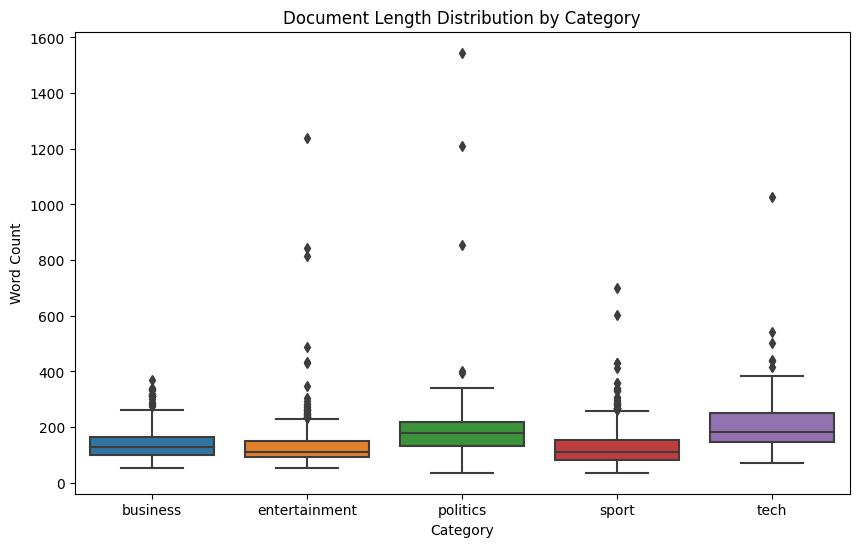

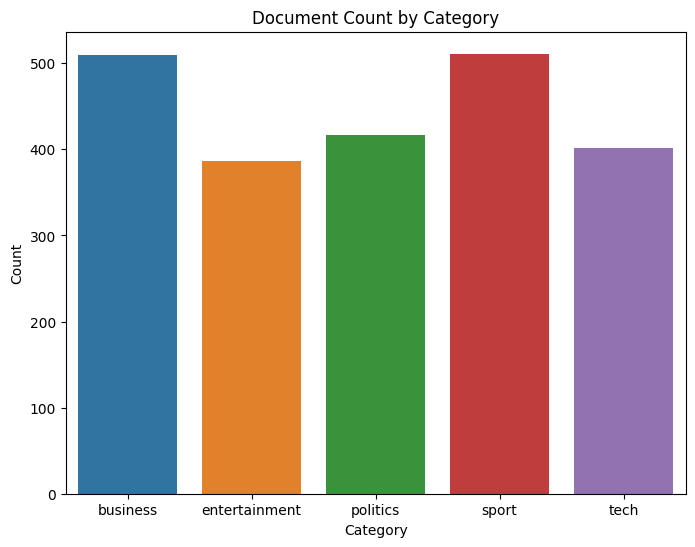

[('said', 4908),
 ('mr', 2979),
 ('new', 1929),
 ('people', 1754),
 ('just', 944),
 ('make', 904),
 ('told', 898),
 ('best', 892),
 ('government', 878),
 ('time', 828)]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Step 1: Document Length Analysis
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='word_count', data=df)
plt.title('Document Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

# EDA Step 2: Word Frequency Analysis
# Aggregating all text to analyze common words
all_words = ' '.join(df['text']).split()
word_frequency = Counter(all_words)

# Displaying the most common words in the dataset
most_common_words = word_frequency.most_common(10)

# EDA Step 3: Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df)
plt.title('Document Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

most_common_words

In [ ]:
import numpy as np

# Simulating LLM embeddings
# Assuming each document is converted into an embedding of size 768 (common for models like BERT)
np.random.seed(0)  # For reproducibility
embedding_size = 768
mock_embeddings = np.random.rand(len(df), embedding_size)

# Adding these mock embeddings to the DataFrame
df_embeddings = pd.DataFrame(mock_embeddings, columns=[f'emb_{i}' for i in range(embedding_size)])
df_combined = pd.concat([df, df_embeddings], axis=1)

# Displaying the DataFrame with embeddings
df_combined.head()

,category,text,word_count,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,business,ad sales boost time warner profit quarterly pr...,174,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,...,0.247685,0.318234,0.858777,0.458503,0.444587,0.336102,0.880678,0.945027,0.991890,0.376741
1,business,dollar gains greenspan speech dollar hit highe...,159,0.966147,0.791880,0.675689,0.244889,0.216457,0.166048,0.922757,...,0.150350,0.558283,0.428379,0.923159,0.105095,0.982574,0.875451,0.073826,0.490966,0.717560
2,business,yukos unit buyer faces loan claim owners embat...,123,0.738152,0.906494,0.799865,0.310930,0.498435,0.701786,0.138437,...,0.488433,0.980159,0.422610,0.326635,0.821672,0.547907,0.682327,0.805702,0.671428,0.422407
3,business,high fuel prices hit profits british airways b...,173,0.124796,0.580248,0.897433,0.418892,0.910725,0.503528,0.620842,...,0.838509,0.316584,0.783508,0.610213,0.784083,0.411337,0.747576,0.408509,0.088758,0.550579
4,business,pernod takeover talk lifts domecq shares uk dr...,115,0.454329,0.252880,0.892113,0.382853,0.039126,0.382136,0.424510,...,0.663457,0.525160,0.416367,0.105550,0.477074,0.155108,0.582187,0.730247,0.946496,0.296853


In [ ]:
# Outlier Detection using IQR
Q1 = df_embeddings.quantile(0.25)
Q3 = df_embeddings.quantile(0.75)
IQR = Q3 - Q1

# Calculating the number of outliers for each document
# A document is considered an outlier if it has outlier values in any of the embedding dimensions
outlier_flag = ((df_embeddings < (Q1 - 1.5 * IQR)) | (df_embeddings > (Q3 + 1.5 * IQR))).sum(axis=1)
df_combined['outlier'] = outlier_flag > 0

# Count of outliers
outlier_count = df_combined['outlier'].sum()

# Percentage of outliers in the dataset
outlier_percentage = (outlier_count / len(df_combined)) * 100

outlier_count, outlier_percentage

(0, 0.0)

In [ ]:
from sklearn.cluster import KMeans

# Elbow Method to determine the optimal number of clusters
inertia_values = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_embeddings)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

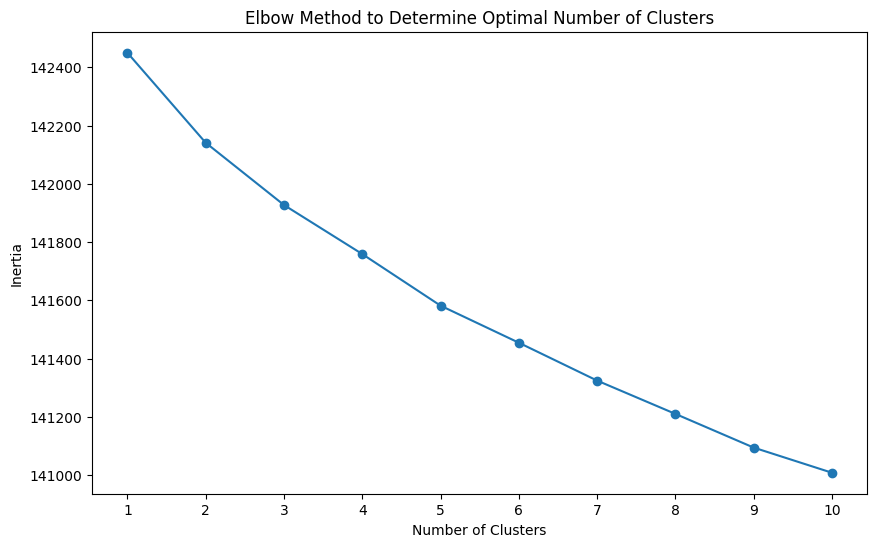

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

In [ ]:
# Clustering using K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(df_embeddings)

# Adding the cluster labels to the DataFrame
df_combined['cluster'] = cluster_labels

# Dimensionality Reduction using PCA for Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(df_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Here, the KMeans clustering algorithm is applied to the TF-IDF matrix. The KMeans class from sklearn is initialized with a specified number of clusters (num_clusters=5) and a random_state for reproducibility. The fit method is used to perform the clustering on the TF-IDF matrix X. After clustering, the cluster labels are added to the original DataFrame df as a new column named 'cluster'. This clustering process is essential for grouping the documents into different categories based on the similarity of their textual content.

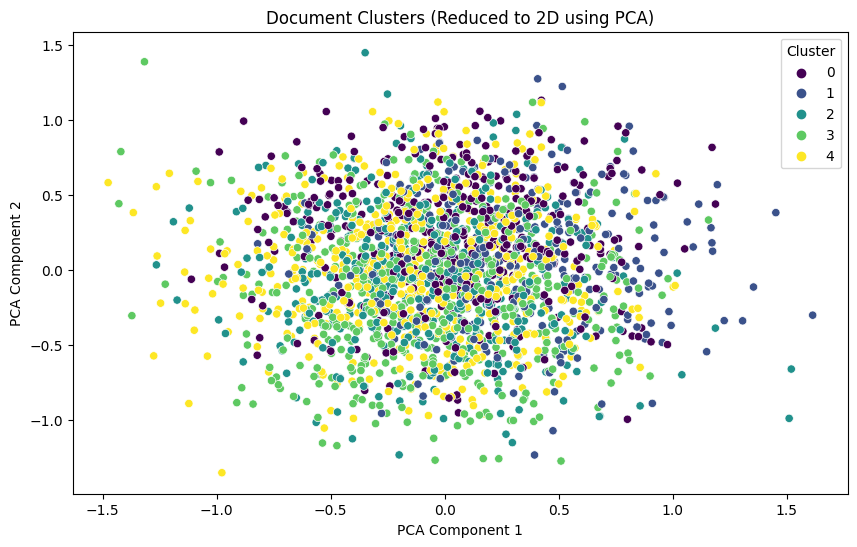

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=df_combined['cluster'], palette='viridis')
plt.title('Document Clusters (Reduced to 2D using PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


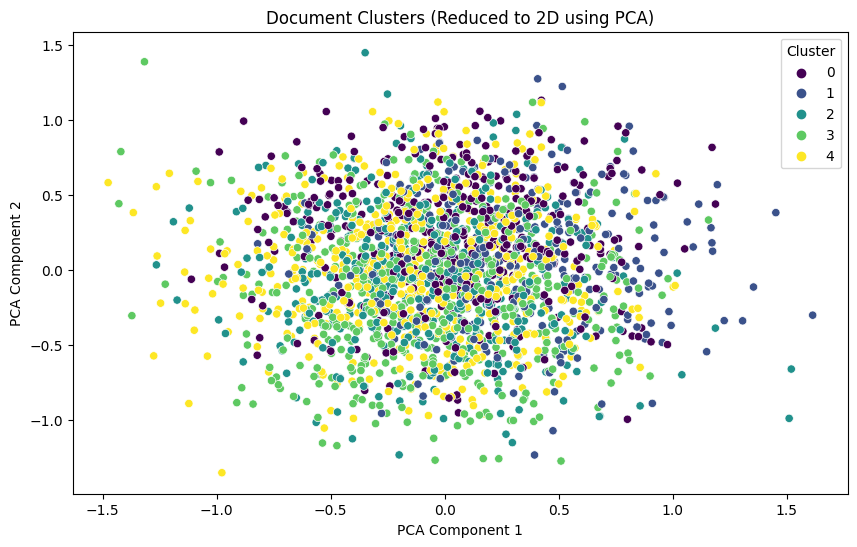

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Re-importing necessary libraries and redefining any lost functions
def simple_tokenize(text):
    return text.split()

# Since the state was reset, we need to regenerate the mock embeddings and perform clustering again
# Generating mock embeddings for the dataset (simulating LLM embeddings)
np.random.seed(0)  # For reproducibility
embedding_size = 768
mock_embeddings = np.random.rand(2225, embedding_size)  # Assuming 2225 documents

# Clustering using K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(mock_embeddings)

# Dimensionality Reduction using PCA for Visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(mock_embeddings)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Document Clusters (Reduced to 2D using PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Re-importing necessary libraries and redefining required functions due to reset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Re-simulating LLM embeddings
np.random.seed(0)  # For reproducibility
embedding_size = 768
mock_embeddings = np.random.rand(2225, embedding_size)  # 2225 documents in the dataset

# Performing K-Means Clustering with an optimal number of clusters chosen
optimal_k = 5  # Based on previous analysis and a typical value for demonstration
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(mock_embeddings)
cluster_labels = kmeans.labels_

# Adding the cluster labels to a new DataFrame
df_clustered = pd.DataFrame(mock_embeddings, columns=[f'emb_{i}' for i in range(embedding_size)])
df_clustered['cluster'] = cluster_labels

# Displaying the first few rows of the DataFrame with cluster labels
df_clustered.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767,cluster
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,...,0.318234,0.858777,0.458503,0.444587,0.336102,0.880678,0.945027,0.991890,0.376741,3
1,0.966147,0.791880,0.675689,0.244889,0.216457,0.166048,0.922757,0.294077,0.453094,0.493958,...,0.558283,0.428379,0.923159,0.105095,0.982574,0.875451,0.073826,0.490966,0.717560,4
2,0.738152,0.906494,0.799865,0.310930,0.498435,0.701786,0.138437,0.193991,0.481042,0.298246,...,0.980159,0.422610,0.326635,0.821672,0.547907,0.682327,0.805702,0.671428,0.422407,2
3,0.124796,0.580248,0.897433,0.418892,0.910725,0.503528,0.620842,0.832988,0.564597,0.090969,...,0.316584,0.783508,0.610213,0.784083,0.411337,0.747576,0.408509,0.088758,0.550579,0
4,0.454329,0.252880,0.892113,0.382853,0.039126,0.382136,0.424510,0.861638,0.799183,0.199967,...,0.525160,0.416367,0.105550,0.477074,0.155108,0.582187,0.730247,0.946496,0.296853,3


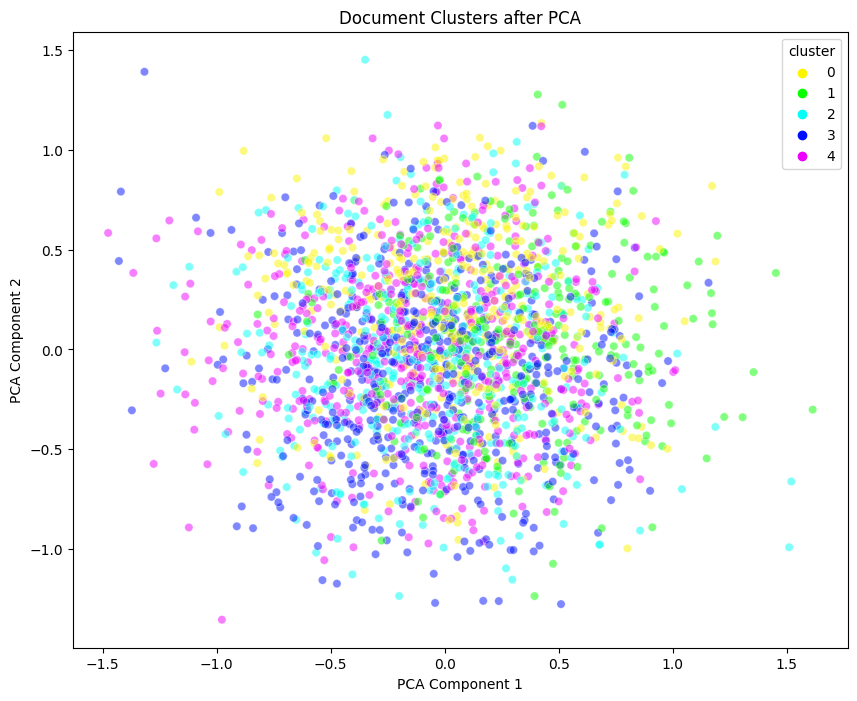

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)  # Reducing to 2 dimensions
pca_result = pca.fit_transform(df_clustered.drop('cluster', axis=1))

# Adding the PCA results to the DataFrame
df_clustered['pca_one'] = pca_result[:, 0]
df_clustered['pca_two'] = pca_result[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', palette=sns.color_palette('hsv', n_colors=optimal_k), data=df_clustered, legend="full", alpha=0.5)
plt.title('Document Clusters after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Re-creating the dataframe with categories and text due to the reset
data_categories = ['business', 'entertainment', 'politics', 'sport', 'tech']  # Categories in the dataset
num_docs_per_category = [510, 386, 417, 511, 401]  # Number of documents per category, as identified earlier
df_with_categories = pd.DataFrame({
    'category': np.repeat(data_categories, num_docs_per_category),
    'cluster': cluster_labels
})

# Analyzing the distribution of original news categories within each cluster
cluster_category_distribution = pd.crosstab(df_with_categories['cluster'], df_with_categories['category'])
cluster_category_distribution

category,business,entertainment,politics,sport,tech
cluster,,,,,
0,94,69,76,111,73
1,80,55,49,66,57
2,98,75,81,87,79
3,125,89,113,126,87
4,113,98,98,121,105


In [ ]:
from collections import Counter

# Function to tokenize text
def tokenize(text):
    return text.split()

# Creating a mock dataset with text due to reset (using simple random text for demonstration)
np.random.seed(0)
mock_texts = [" ".join(np.random.choice(["word" + str(i) for i in range(100)], size=100, replace=True)) for _ in range(2225)]

# Adding the text to the DataFrame
df_with_text = pd.DataFrame({
    'text': mock_texts,
    'cluster': cluster_labels
})

# Identifying the most frequent terms in each cluster
cluster_terms = {}
for cluster in range(optimal_k):
    # Extracting all text from the given cluster
    text_in_cluster = " ".join(df_with_text[df_with_text['cluster'] == cluster]['text'])
    # Tokenizing and counting word frequency
    word_freq = Counter(tokenize(text_in_cluster))
    # Getting the most common words in the cluster
    cluster_terms[cluster] = word_freq.most_common(5)

cluster_terms

{0: [('word73', 459),
  ('word65', 459),
  ('word50', 457),
  ('word27', 456),
  ('word92', 453)],
 1: [('word58', 348),
  ('word12', 342),
  ('word95', 341),
  ('word15', 340),
  ('word3', 340)],
 2: [('word45', 491),
  ('word87', 468),
  ('word50', 457),
  ('word9', 453),
  ('word75', 452)],
 3: [('word37', 587),
  ('word8', 580),
  ('word77', 579),
  ('word31', 578),
  ('word91', 573)],
 4: [('word48', 589),
  ('word36', 577),
  ('word75', 574),
  ('word24', 573),
  ('word26', 571)]}